**Francis O'Hara**

CS 251: Data Analysis and Visualization

# Lab 5 | K-Means Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import kmeans2

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [12, 5]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

 

## Task 1:  Import and explore the data

We are going to be using K-Means to explore the flea beetle dataset which contains measurements of three different types of beetles.

**Dataset Variables**      
**species:** Ch. concinna, Ch. heptapotamica, and Ch. heikertingeri     
**tars1:** width of the first joint of the first tarsus in microns    
**tars2:** width of the second joint of the first tarsus in microns    
**head:** the maximal width of the head between the external edges of the eyes in 0.01 mm    
**aede1:** the maximal width of the aedeagus in the fore-part in microns     
**aede2:** the front angle of the aedeagus (1 unit = 7.5 degrees)    
**aede3:** the aedeagus width from the side in microns    
 
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from `data/flea.csv`.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, check out the data
    1. Print the shape of the data
    2. Print first 5 rows of the data using head.
3. The `species` variable is a categorical data variable with 3 levels: `['Concinna', 'Heikert', 'Heptapot']`. Convert the data type of this column in the DataFrame to [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html).
   1. Print the first 5 items of the updated DataFrane column to make sure that the replace worked correctly. You should see `Categories (3, object): ['Concinna', 'Heikert', 'Heptapot']` at the bottom of the print-out.
4. Create a list of color-blind friendly hard-coded RGB colors that will be used to color samples that belong to the same cluster. Pick either the [Okabe & Ito or one of the Petroff color palettes](https://github.com/proplot-dev/proplot/issues/424) (*These lists have been studied to be effective for colorblind individuals*). Your list of color strings should be at least as long as the number of clusters you select. Since there are 3 in this lab, any of the color palettes will work. *Each string is represented as a [hexadecimal color code](https://en.wikipedia.org/wiki/Web_colors)*.
5. Graph a scatterplot of the `tars1` and `aede3` columns using plt.scatter
    1. Write a loop that runs for 3 iterations (one for each flea species).
    2. Inside the loop, use logical indexing to select rows in the DataFrame that have the current species level. Assign this 'filtered' DataFrame to a temp variable. If everything is working as expected, you should have `21`, `31`, and `22` samples for the species `'Concinna'`, `'Heikert'`, `'Heptapot'`, respectively.
    3. Plot `tars1` on the x axis and `aede3` on the y axis from the **filtered** DataFrame with markers that have a black edgecolor. Set the color to one of the strings from your hard-coded list of colors.
    4. Add a useful title, and axis labels.

beetle_df.shape=(74, 8)
   id  tars1  tars2  head  aede1  aede2  aede3   species
0   1    191    131    53    150     15    104  Concinna
1   2    185    134    50    147     13    105  Concinna
2   3    200    137    52    144     14    102  Concinna
3   4    173    127    50    144     16     97  Concinna
4   5    171    118    49    153     13    106  Concinna
0    Concinna
1    Concinna
2    Concinna
3    Concinna
4    Concinna
Name: species, dtype: category
Categories (3, object): ['Concinna', 'Heikert', 'Heptapot']


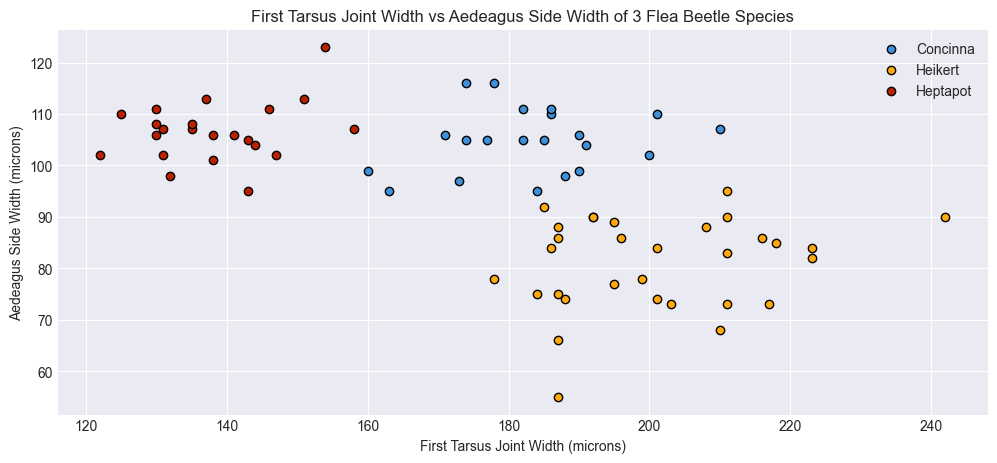

In [15]:
species = ['Concinna', 'Heikert', 'Heptapot']

beetle_df = pd.read_csv("data/flea.csv")
print(f"{beetle_df.shape=}")
print(beetle_df.head())

beetle_df["species"] = beetle_df["species"].astype("category")
print(beetle_df["species"].head())

colors = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]


for i in range(len(species)):
    filtered_beetle_df = beetle_df[beetle_df["species"] == species[i]]
    plt.scatter(filtered_beetle_df["tars1"], filtered_beetle_df["aede3"], color=colors[i], edgecolor="black", label=species[i])


plt.title("First Tarsus Joint Width vs Aedeagus Side Width of 3 Flea Beetle Species")
plt.xlabel("First Tarsus Joint Width (microns)")
plt.ylabel("Aedeagus Side Width (microns)")
plt.legend()
plt.show()

## Task 2: K-Means

1. Use the [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html) documentation to find out how to calculate K-Means on for the columns `tars1` and `aede3` using  kmeans2 
    1. Use 3 clusters and set the method of initialization to random. 
    2. Make sure to convert the data to floats, with `.astype('float')` before running the analysis.
2. Calculate the **inertia**: how closely packed samples are around their cluster centroids in the current clustering.
    1. For each data sample calculate the **squared** euclidean distance between that sample and its cluster centroid. Average these values across all samples.
    2. Print the inertia.
3. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
    1. Graph `'tars1'` on the x axis and `'aede3'` on the y axis
    2. Have a title for each subplot, and axis labels.
    3. Graph the original data following the instructions from Part 1 in the first subplot. 
        1. Use the `species` column of your data for the color with a black edgecolor
    4. Graph the results of K-means in the second subplot. [See example](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html)
        1. Graph the data colored by the clusters with the centroids labeled. Use your colorblind-friendly custom color palette to color each of the three clusters.

You should get an inertia of ~203.


inertia=203.02897851267423


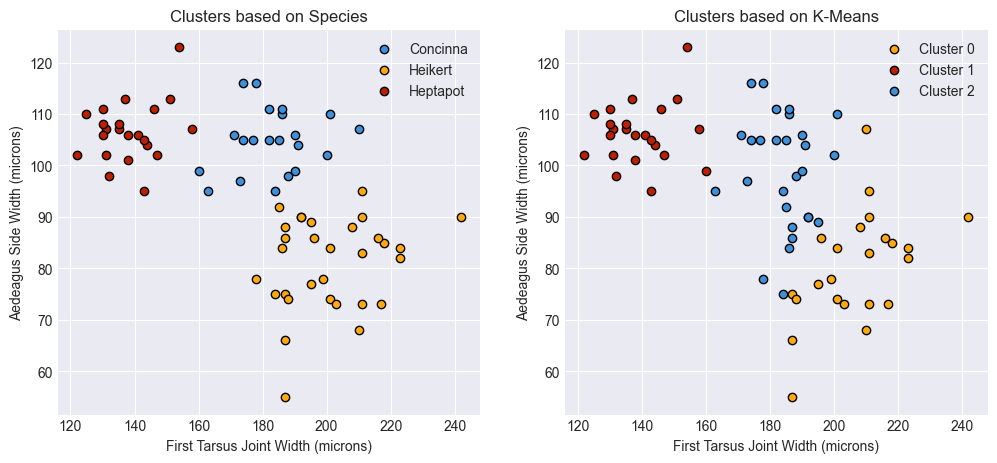

In [ ]:
np.random.seed(1)

centroids, labels = kmeans2(beetle_df[["tars1", "aede3"]].astype("float"), 3)

def euclidian_distance(point1, point2):
    """Returns the Euclidian distance between any two points `point1` and `point2` in an N-dimensional space,
        where N is the length of `point1` and `point2` each.

        Parameters
        ----------
        point1 : array-like; shape=(N,)
                Array containing coordintes of the first point. Must have same length as `point2`
        point2 : array-like; shape=(N,)
                Array cointaing coordinates of the second point. Must have same length as `point1`.
       
        Returns
        -------
        float :
            The Euclidian distance between `point1` and `point2`.
       """
    
    n = len(point1)
    if n != len(point2):
        raise ValueError("`point1` and `point2` must have the same shape.")
    
    sum_of_squared_differences = 0

    for i in range(n):
        sum_of_squared_differences += (point1[i] - point2[i]) ** 2

    return sum_of_squared_differences ** 0.5


sum_squared_euclidian_distances = 0

for row in range(beetle_df.shape[0]):
    point = list(beetle_df[["tars1", "aede3"]].astype("float").iloc[row, :])
    centroid = centroids[labels[row]]
    sum_squared_euclidian_distances += euclidian_distance(centroid, point) ** 2

inertia = float(sum_squared_euclidian_distances / len(labels))
print(f"{inertia=}")



fig, axs = plt.subplots(1, 2)

for i in range(len(species)):
    filtered_beetle_df = beetle_df[beetle_df["species"] == species[i]]
    axs[0].scatter(filtered_beetle_df["tars1"], filtered_beetle_df["aede3"], color=colors[i], edgecolor="black", label=species[i])


axs[0].set_title("Clusters based on Species")
axs[0].set_xlabel("First Tarsus Joint Width (microns)")
axs[0].set_ylabel("Aedeagus Side Width (microns)")
axs[0].legend()

for i in sorted(set(labels)):
    filtered_beetle_df = beetle_df[labels == i]
    color_selector = {0:1, 1:2, 2:0}
    axs[1].scatter(filtered_beetle_df["tars1"], filtered_beetle_df["aede3"], color=colors[color_selector[i]], edgecolor="black", label=f"Cluster {i}")

axs[1].set_title("Clusters based on K-Means")
axs[1].set_xlabel("First Tarsus Joint Width (microns)")
axs[1].set_ylabel("Aedeagus Side Width (microns)")
axs[1].legend()
plt.show()


## Task 3: Analysis

1. Write code that calculates the kmeans2 50 times
2. Save the centroids, labels and inertia for each clustering instance.

In [73]:
np.random.seed(1)

kmeans_results = []

for i in range(50):
    centroids, labels = kmeans2(beetle_df[["tars1", "aede3"]].astype("float"), 3)

    sum_squared_euclidian_distances = 0

    for row in range(beetle_df.shape[0]):
        point = list(beetle_df[["tars1", "aede3"]].astype("float").iloc[row, :])
        centroid = centroids[labels[row]]
        sum_squared_euclidian_distances += euclidian_distance(centroid, point) ** 2

    inertia = float(sum_squared_euclidian_distances / len(labels))

    kmeans_results.append([centroids, labels, inertia])


3. Graph a plot with 3 subplots
    1. **Original:** The first plot should graph Graph `'tars1'` on the x axis and `'aede3'` on the y axis with the original labels
    2. **Best clustering:** Using your above analysis the second plot should graph the results with the **best** K-Means fit using the saved labels and centroids from the above analysis.
    3. **Worst clustering:** Using your above analysis the third plot should graph the results with the worst K-Means fit using the saved labels and centroids from the above analysis.
    4. For formatting, follow the instructions in Task 2.

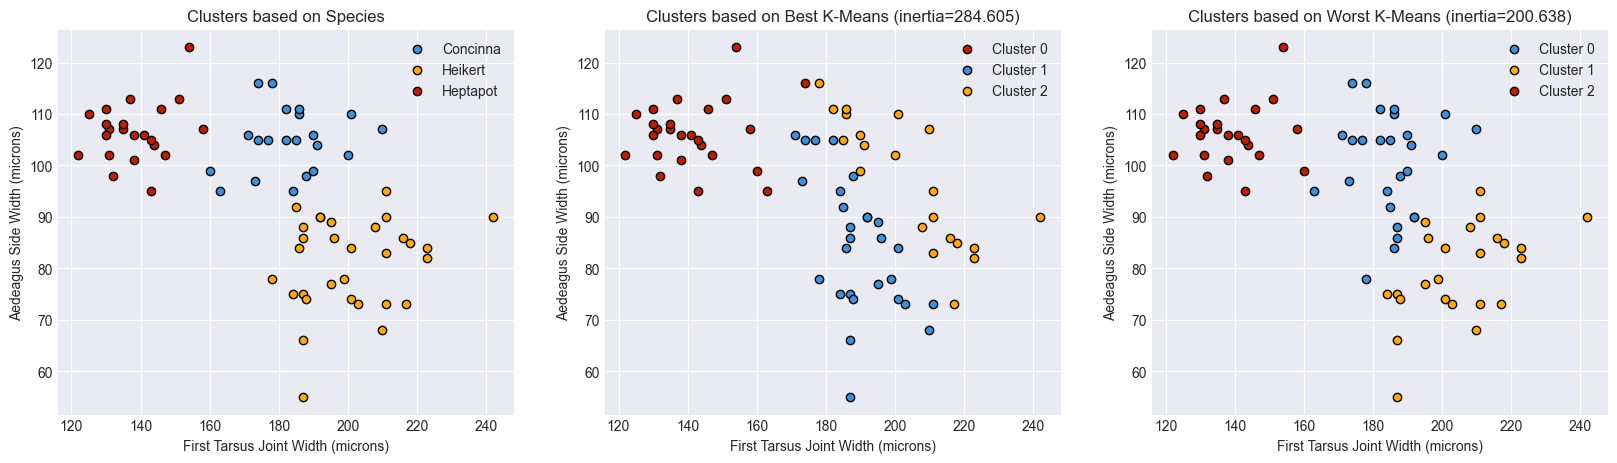

In [94]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(20)

# plot species-based results
for i in range(len(species)):
    filtered_beetle_df = beetle_df[beetle_df["species"] == species[i]]
    axs[0].scatter(filtered_beetle_df["tars1"], filtered_beetle_df["aede3"], color=colors[i], edgecolor="black", label=species[i])


axs[0].set_title("Clusters based on Species")
axs[0].set_xlabel("First Tarsus Joint Width (microns)")
axs[0].set_ylabel("Aedeagus Side Width (microns)")
axs[0].legend()

# identify best and worst clustering results
best_inertia = float("-inf")
i_best = None
worst_inertia = float("inf")
i_worst = None

for i in range(len(kmeans_results)):
    inertia = kmeans_results[i][2]
    if inertia >= best_inertia:
       best_inertia = inertia
       i_best = i
    
    if inertia <= worst_inertia:
        worst_inertia = inertia
        i_worst = i

# plot best results
centroids = kmeans_results[i_best][0]
labels = kmeans_results[i_best][1]
inertia = kmeans_results[i_best][2]

for i in sorted(set(labels)):
    filtered_beetle_df = beetle_df[labels == i]
    color_selector = {0:2, 1:0, 2:1}
    axs[1].scatter(filtered_beetle_df["tars1"], filtered_beetle_df["aede3"], color=colors[color_selector[i]], edgecolor="black", label=f"Cluster {i}")

axs[1].set_title(f"Clusters based on Best K-Means (inertia={inertia:.3f})")
axs[1].set_xlabel("First Tarsus Joint Width (microns)")
axs[1].set_ylabel("Aedeagus Side Width (microns)")
axs[1].legend()


# plot worst results
centroids = kmeans_results[i_worst][0]
labels = kmeans_results[i_worst][1]
inertia = kmeans_results[i_worst][2]

for i in sorted(set(labels)):
    filtered_beetle_df = beetle_df[labels == i]
    color_selector = {0:0, 1:1, 2:2}
    axs[2].scatter(filtered_beetle_df["tars1"], filtered_beetle_df["aede3"], color=colors[color_selector[i]], edgecolor="black", label=f"Cluster {i}")

axs[2].set_title(f"Clusters based on Worst K-Means (inertia={inertia:.3f})")
axs[2].set_xlabel("First Tarsus Joint Width (microns)")
axs[2].set_ylabel("Aedeagus Side Width (microns)")
axs[2].legend()
plt.show()

#### Question 1: Why does kmeans produce different solutions?

#### Answer 1:  
Kmeans produces different solutions because its outcome depends entirely on the initial starting conditions (starting centroids). In our case, for each run of the kMeans algorithm, we select different starting centroids at random, and therefore for each run the solution produced will be different.